## Chapter 10. GA 데이터 적용 시나리오

### 01. 분석의 목적
- Google BigQuery를 통해서 데이터 불러오기
- Python에서 BigQuery 접근하기
- Json 포맷의 데이터 다루기

### 02. Python에서 BigQuery 데이터 불러오기
- conda install pandas-gbq -c conda-forge
- from pandas.io import gbq
- query = ''' 쿼리문 작성 '''
- data = gbq.read_gbq(query, project_id="BigQuery 프로젝트 ID")

### 03. 데이터 및 모듈 로딩
- BigQuery Data 업로드 용량에 제한이 있어, csv 파일로 실습 진행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [2]:
data = pd.read_csv('./data/ga.csv')

data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [3]:
data.iloc[0]['device']

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Linux", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

### 04. Json 타입 데이터 처리하기

In [4]:
sample = data.iloc[0]['device']

json.loads(sample)

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

- 방법 1

In [5]:
data['device'].apply(lambda x: json.loads(x))

0        {'browser': 'Chrome', 'browserVersion': 'not a...
1        {'browser': 'Chrome', 'browserVersion': 'not a...
2        {'browser': 'Chrome', 'browserVersion': 'not a...
3        {'browser': 'Chrome', 'browserVersion': 'not a...
4        {'browser': 'Chrome', 'browserVersion': 'not a...
                               ...                        
11510    {'browser': 'Chrome', 'browserVersion': 'not a...
11511    {'browser': 'Chrome', 'browserVersion': 'not a...
11512    {'browser': 'Chrome', 'browserVersion': 'not a...
11513    {'browser': 'Firefox', 'browserVersion': 'not ...
11514    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 11515, dtype: object

- 방법 2

In [6]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.194190e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1472843572,1,1472843572
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5.327170e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""10...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472844906,3,1472844906
2,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8.885050e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""11...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472827393,7,1472827393
3,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.854680e+17,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""13"", ""pageviews"": ""12...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472846398,6,1472846398
4,Referral,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.244890e+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""14...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1472824817,4,1472824817


In [7]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

data = pd.read_csv('./data/ga.csv', converters={column: json.loads for column in json_columns})

data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Direct,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",6.194190e+18,"{'continent': 'Americas', 'subContinent': 'Nor...",6194193421514403509_1472843572,Not Socially Engaged,"{'visits': '1', 'hits': '11', 'pageviews': '11...","{'campaign': '(not set)', 'source': '(direct)'...",1472843572,1,1472843572
1,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",5.327170e+18,"{'continent': 'Americas', 'subContinent': 'Nor...",5327166854580374902_1472844906,Not Socially Engaged,"{'visits': '1', 'hits': '11', 'pageviews': '10...","{'campaign': '(not set)', 'source': 'google', ...",1472844906,3,1472844906
2,Referral,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",8.885050e+18,"{'continent': 'Americas', 'subContinent': 'Nor...",8885051388942907862_1472827393,Not Socially Engaged,"{'visits': '1', 'hits': '13', 'pageviews': '11...","{'referralPath': '/', 'campaign': '(not set)',...",1472827393,7,1472827393
3,Referral,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",1.854680e+17,"{'continent': 'Americas', 'subContinent': 'Nor...",0185467632009737931_1472846398,Not Socially Engaged,"{'visits': '1', 'hits': '13', 'pageviews': '12...","{'referralPath': '/', 'campaign': '(not set)',...",1472846398,6,1472846398
4,Referral,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",3.244890e+18,"{'continent': 'Americas', 'subContinent': 'Nor...",3244885836845029978_1472824817,Not Socially Engaged,"{'visits': '1', 'hits': '17', 'pageviews': '14...","{'referralPath': '/', 'campaign': '(not set)',...",1472824817,4,1472824817


In [8]:
data.iloc[0]['device']

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Linux',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [9]:
json_normalize(data['device'])

/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11511,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11512,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
11513,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [10]:
device = json_normalize(data['device'])
geoNetwork = json_normalize(data['geoNetwork'])
totals = json_normalize(data['totals'])
trafficSource = json_normalize(data['trafficSource'])

/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [11]:
device.columns = [f'device.{i}' for i in device.columns]

device.head()

,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [12]:
geoNetwork.columns = [f'geoNetwork.{i}' for i in geoNetwork.columns]
totals.columns = [f'totals.{i}' for i in totals.columns]
trafficSource.columns = [f'trafficSource.{i}' for i in trafficSource.columns]

In [13]:
pd.concat([data, device, geoNetwork, totals, trafficSource], axis=1).drop(json_columns, axis=1)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,Referral,20170104,6.849600e+18,6849604863010168468_1483566314,Not Socially Engaged,1483566314,10,1483566314,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11511,Referral,20170104,2.119870e+17,0211986650009953276_1483568879,Not Socially Engaged,1483568879,2,1483568879,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11512,Referral,20170104,9.981560e+18,9981562221973608723_1483576938,Not Socially Engaged,1483576938,1,1483576938,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
11513,Direct,20170104,9.631260e+17,963126344221316701_1483552674,Not Socially Engaged,1483552674,3,1483552674,Firefox,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 위 과정의 좀 더 간결한 방법

In [14]:
for i in json_columns:
    json_df = json_normalize(data[i])
    json_df.columns = [f'{i}.{j}' for j in json_df.columns]
    data = pd.concat([data.drop(i, axis=1), json_df], axis=1)

data.head()

/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,...,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,Chrome,not available in demo dataset,...,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN


### 05. 데이터 탐색 및 클리닝

In [15]:
pd.set_option('display.max_columns', 100)

data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,37860000,1,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,306670000,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,68030000,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [17]:
totals = ['totals.visits', 'totals.hits', 'totals.pageviews', 'totals.transactionRevenue', 'totals.newVisits']

for i in totals:
    data[i] = pd.to_numeric(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   fullVisitorId                                      11515 non-null  float64
 3   sessionId                                          11515 non-null  object 
 4   socialEngagementType                               11515 non-null  object 
 5   visitId                                            11515 non-null  int64  
 6   visitNumber                                        11515 non-null  int64  
 7   visitStartTime                                     11515 non-null  int64  
 8   device.browser                                     11515 non-null  object 
 9   device

In [18]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits
count,1.151500e+04,1.151500e+04,1.151500e+04,11515.000000,1.151500e+04,11515.0,11515.000000,11515.000000,1.151500e+04,4465.0
mean,2.016622e+07,4.503303e+18,1.485876e+09,4.083196,1.485876e+09,1.0,36.274251,28.330439,1.337448e+08,1.0
std,4.687452e+03,3.062080e+18,9.308961e+06,12.508556,9.308963e+06,0.0,30.269294,21.727555,4.482852e+08,0.0
min,2.016080e+07,2.131310e+14,1.470046e+09,1.000000,1.470046e+09,1.0,2.000000,2.000000,1.000000e+04,1.0
25%,2.016110e+07,1.639590e+18,1.478054e+09,1.000000,1.478054e+09,1.0,19.000000,16.000000,2.493000e+07,1.0
50%,2.017013e+07,4.377180e+18,1.485554e+09,2.000000,1.485554e+09,1.0,28.000000,23.000000,4.945000e+07,1.0
75%,2.017050e+07,7.184570e+18,1.493948e+09,4.000000,1.493948e+09,1.0,44.000000,34.000000,1.076550e+08,1.0
max,2.017080e+07,9.999000e+18,1.501652e+09,315.000000,1.501652e+09,1.0,500.000000,469.000000,2.312950e+10,1.0


- 'totals.transactionRevenue'의 경우 급격하게 증가하는 것을 볼 수 있는데, 이러한 경우 log를 취하면 분석에 훨씬 용이함

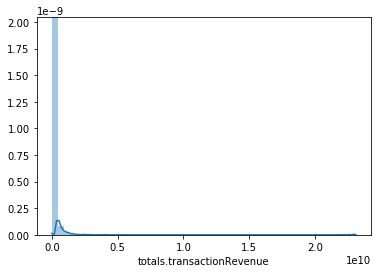

In [19]:
sns.distplot(data['totals.transactionRevenue'])

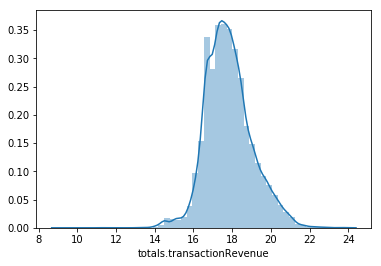

In [20]:
sns.distplot(np.log(data['totals.transactionRevenue']))

In [21]:
data['totals.transactionRevenue'] = np.log(data['totals.transactionRevenue'])

data.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

In [22]:
drop_list = ['fullVisitorId', 'sessionId', 'visitId', 'visitStartTime']

data.drop(drop_list, axis=1, inplace=True)

data.head()

,channelGrouping,date,socialEngagementType,visitNumber,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,1.0,(not set),(direct),(none),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,NaN,(not set),google,organic,True,not available in demo dataset,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,NaN,(not set),mall.googleplex.com,referral,True,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo da

### 06. Missing Value 확인 및 처리

In [23]:
data.isna().mean()[data.isna().mean() > 0.9]

trafficSource.adContent                         0.987581
trafficSource.adwordsClickInfo.page             0.960573
trafficSource.adwordsClickInfo.slot             0.960573
trafficSource.adwordsClickInfo.gclId            0.960399
trafficSource.adwordsClickInfo.adNetworkType    0.960573
trafficSource.adwordsClickInfo.isVideoAd        0.960573
dtype: float64

In [24]:
na_list = data.isna().mean()[data.isna().mean() > 0.9].index

data.drop(na_list, axis=1, inplace=True)

data.isna().mean()

channelGrouping                                      0.000000
date                                                 0.000000
socialEngagementType                                 0.000000
visitNumber                                          0.000000
device.browser                                       0.000000
device.browserVersion                                0.000000
device.browserSize                                   0.000000
device.operatingSystem                               0.000000
device.operatingSystemVersion                        0.000000
device.isMobile                                      0.000000
device.mobileDeviceBranding                          0.000000
device.mobileDeviceModel                             0.000000
device.mobileInputSelector                           0.000000
device.mobileDeviceInfo                              0.000000
device.mobileDeviceMarketingName                     0.000000
device.flashVersion                                  0.000000
device.l

In [25]:
data.isna().mean()[data.isna().mean() > 0]

totals.newVisits              0.612245
trafficSource.isTrueDirect    0.391750
trafficSource.keyword         0.663830
trafficSource.referralPath    0.529744
dtype: float64

In [26]:
data['totals.newVisits']

0        1.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11510    NaN
11511    NaN
11512    1.0
11513    NaN
11514    NaN
Name: totals.newVisits, Length: 11515, dtype: float64

In [27]:
data['totals.newVisits'].value_counts()

1.0    4465
Name: totals.newVisits, dtype: int64

In [28]:
data['trafficSource.isTrueDirect'].value_counts()

True    7004
Name: trafficSource.isTrueDirect, dtype: int64

- 'totals.newVisits', 'trafficSource.isTrueDirect'는 한 컬럼에 한 종류의 데이터만 존재하기 때문에 의미가 없음

In [29]:
data.drop(['totals.newVisits', 'trafficSource.isTrueDirect'], axis=1, inplace=True)

In [30]:
data['trafficSource.keyword'].value_counts()

(not provided)                             3387
6qEhsCssdK0z36ri                            261
google merchandise store                     59
1hZbAqLCbjwfgOH7                             56
Google Merchandise                           45
(Remarketing/Content targeting)               9
+Google +Merchandise                          7
1X4Me6ZKNV0zg-jV                              6
+Google +Swag                                 3
google store                                  3
+Google +Gear                                 3
category_l1==166                              2
+google +store                                2
google stickers                               2
youtube merch                                 2
+google +merchandise +store                   2
GOOGLE MERCHANDISE                            2
google store merchandise                      2
google apparel store                          2
googlesupport                                 1
+google+tshirts                         

In [31]:
data['trafficSource.keyword'] = data['trafficSource.keyword'].fillna('unknown')

In [32]:
data['trafficSource.referralPath'].value_counts()

/                                                                                                                                                                                  5151
/mail/u/0/                                                                                                                                                                           55
/a/google.com/forum/                                                                                                                                                                 35
/google-merchandise-store                                                                                                                                                            22
/offer/2145                                                                                                                                                                          18
/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179     

In [33]:
data.drop('trafficSource.referralPath', axis=1, inplace=True)

data.head()

,channelGrouping,date,socialEngagementType,visitNumber,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.keyword
0,Direct,20160902,Not Socially Engaged,1,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11,17.449406,(not set),(direct),(none),not available in demo dataset,unknown
1,Organic Search,20160902,Not Socially Engaged,3,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10,19.541283,(not set),google,organic,not available in demo dataset,(not provided)
2,Referral,20160902,Not Socially Engaged,7,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11,18.035459,(not set),mall.googleplex.com,referral,not available in demo dataset,unknown
3,Referral,20160902,Not Socially Engaged,6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,12,17.083177,(not set),mall.googleplex.com,referral,not available in demo dataset,unknown
4,Referral,20160902,Not Socially Engaged,4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available 

### 07. 카테고리 변수 처리

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    11515 non-null  object 
 1   date                                               11515 non-null  int64  
 2   socialEngagementType                               11515 non-null  object 
 3   visitNumber                                        11515 non-null  int64  
 4   device.browser                                     11515 non-null  object 
 5   device.browserVersion                              11515 non-null  object 
 6   device.browserSize                                 11515 non-null  object 
 7   device.operatingSystem                             11515 non-null  object 
 8   device.operatingSystemVersion                      11515 non-null  object 
 9   device

In [35]:
for i in data.columns:
    if data[i].dtype == 'O':
        print(i, data[i].nunique())

channelGrouping 8
socialEngagementType 1
device.browser 9
device.browserVersion 1
device.browserSize 1
device.operatingSystem 7
device.operatingSystemVersion 1
device.mobileDeviceBranding 1
device.mobileDeviceModel 1
device.mobileInputSelector 1
device.mobileDeviceInfo 1
device.mobileDeviceMarketingName 1
device.flashVersion 1
device.language 1
device.screenColors 1
device.screenResolution 1
device.deviceCategory 3
geoNetwork.continent 6
geoNetwork.subContinent 19
geoNetwork.country 69
geoNetwork.region 79
geoNetwork.metro 46
geoNetwork.city 134
geoNetwork.cityId 1
geoNetwork.networkDomain 732
geoNetwork.latitude 1
geoNetwork.longitude 1
geoNetwork.networkLocation 1
trafficSource.campaign 7
trafficSource.source 44
trafficSource.medium 7
trafficSource.adwordsClickInfo.criteriaParameters 1
trafficSource.keyword 36


In [36]:
count = pd.DataFrame(columns=['count'])

for i in data.columns:
    if data[i].dtype == 'O':
        count.loc[i] = data[i].nunique()

count

,count
channelGrouping,8
socialEngagementType,1
device.browser,9
device.browserVersion,1
device.browserSize,1
device.operatingSystem,7
device.operatingSystemVersion,1
device.mobileDeviceBranding,1
device.mobileDeviceModel,1
device.mobileInputSelector,1


In [37]:
count[count['count'] == 1].index

Index(['socialEngagementType', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystemVersion', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation',
       'trafficSource.adwordsClickInfo.criteriaParameters'],
      dtype='object')

In [38]:
value_one = count[count['count'] == 1].index

data.drop(value_one, axis=1, inplace=True)

data.head()

,channelGrouping,date,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword
0,Direct,20160902,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,(not set),1,11,11,17.449406,(not set),(direct),(none),unknown
1,Organic Search,20160902,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York,New York NY,New York,(not set),1,11,10,19.541283,(not set),google,organic,(not provided)
2,Referral,20160902,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York,New York NY,New York,(not set),1,13,11,18.035459,(not set),mall.googleplex.com,referral,unknown
3,Referral,20160902,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,(not set),1,13,12,17.083177,(not set),mall.googleplex.com,referral,unknown
4,Referral,20160902,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),1,17,14,20.168401,(not set),mall.googleplex.com,referral,unknown


In [39]:
value_large = count[count['count'] > 70].index

data.drop(value_large, axis=1, inplace=True)

data.head()

,channelGrouping,date,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.metro,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword
0,Direct,20160902,1,Chrome,Linux,False,desktop,Americas,Northern America,United States,Detroit MI,1,11,11,17.449406,(not set),(direct),(none),unknown
1,Organic Search,20160902,3,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,New York NY,1,11,10,19.541283,(not set),google,organic,(not provided)
2,Referral,20160902,7,Chrome,Linux,False,desktop,Americas,Northern America,United States,New York NY,1,13,11,18.035459,(not set),mall.googleplex.com,referral,unknown
3,Referral,20160902,6,Chrome,Windows,False,desktop,Americas,Northern America,United States,San Francisco-Oakland-San Jose CA,1,13,12,17.083177,(not set),mall.googleplex.com,referral,unknown
4,Referral,20160902,4,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,1,17,14,20.168401,(not set),mall.googleplex.com,referral,unknown


In [40]:
obj_list = []

for i in data.columns:
    if data[i].dtype == 'O':
        obj_list.append(i)

obj_list

['channelGrouping',
 'device.browser',
 'device.operatingSystem',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword']

In [41]:
data = pd.get_dummies(data, columns=obj_list, drop_first=True)

data.head()

,date,visitNumber,device.isMobile,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.browser_Android Webview,device.browser_Chrome,device.browser_Edge,device.browser_Firefox,device.browser_Internet Explorer,device.browser_Opera,device.browser_Safari,device.browser_Safari (in-app),device.operatingSystem_Chrome OS,device.operatingSystem_Linux,device.operatingSystem_Macintosh,device.operatingSystem_Windows,device.operatingSystem_Windows Phone,device.operatingSystem_iOS,device.deviceCategory_mobile,device.deviceCategory_tablet,geoNetwork.continent_Africa,geoNetwork.continent_Americas,geoNetwork.continent_Asia,geoNetwork.continent_Europe,geoNetwork.continent_Oceania,geoNetwork.subContinent_Australasia,geoNetwork.subContinent_Caribbean,geoNetwork.subContinent_Central America,geoNetwork.subContinent_Central Asia,geoNetwork.subContinent_Eastern Africa,geoNetwork.subContinent_Eastern Asia,geoNetwork.subContinent_Eastern Europe,geoNetwork.subContinent_Northern Africa,geoNetwork.subContinent_Northern America,geoNetwork.subContinent_Northern Europe,geoNetwork.subContinent_South America,geoNetwork.subContinent_Southeast Asia,geoNetwork.subContinent_Southern Africa,geoNetwork.subContinent_Southern Asia,geoNetwork.subContinent_Southern Europe,...,trafficSource.source_search.xfinity.com,trafficSource.source_seroundtable.com,trafficSource.source_siliconvalley.about.com,trafficSource.source_sites.google.com,trafficSource.source_t.co,trafficSource.source_trainup.withgoogle.com,trafficSource.source_us-mg5.mail.yahoo.com,trafficSource.source_yahoo,trafficSource.source_youtube.com,trafficSource.medium_(not set),trafficSource.medium_affiliate,trafficSource.medium_cpc,trafficSource.medium_cpm,trafficSource.medium_organic,trafficSource.medium_referral,trafficSource.keyword_(automatic matching),trafficSource.keyword_(not provided),trafficSource.keyword_+Google +Gear,trafficSource.keyword_+Google +Merchandise,trafficSource.keyword_+Google +Swag,trafficSource.keyword_+google +coffee +mug,trafficSource.keyword_+google +merch,trafficSource.keyword_+google +merchandise +store,trafficSource.keyword_+google +store,trafficSource.keyword_+google +stores,trafficSource.keyword_+google+tshirts,trafficSource.keyword_1X4Me6ZKNV0zg-jV,trafficSource.keyword_1hZbAqLCbjwfgOH7,trafficSource.keyword_6qEhsCssdK0z36ri,trafficSource.keyword_GOOGLE MERCHANDISE,trafficSource.keyword_Google Merchandise,trafficSource.keyword_YouTube Merchandise,trafficSource.keyword_Youtube merchandise store,trafficSource.keyword_category_l1==166,trafficSource.keyword_google apparel store,trafficSource.keyword_google items for sale,trafficSource.keyword_google men's hoodie pullover,trafficSource.keyword_google merch,trafficSource.keyword_google merchandise,trafficSource.keyword_google merchandise store,trafficSource.keyword_google shirt,trafficSource.keyword_google stickers,trafficSource.keyword_google store,trafficSource.keyword_google store merchandise,trafficSource.keyword_googlemerchandisestore,trafficSource.keyword_googlesupport,trafficSource.keyword_unknown,trafficSource.keyword_you tube trucker cap google merchandise,trafficSource.keyword_youtube merch,trafficSource.keyword_youtube merchandise store
0,20160902,1,False,1,11,11,17.449406,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,20160902,3,False,1,11,10,19.541283,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20160902,7,False,1,13,11,18.035459,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0

### 08. Random Forest로 예측 모델 만들기

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop('totals.transactionRevenue', axis=1)
y = data['totals.transactionRevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10, n_estimators=1000)
model.fit(X_train, y_train)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `boo

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
pred = model.predict(X_test)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [45]:
from sklearn.metrics import mean_squared_error

# RMSE
mean_squared_error(y_test, pred) ** 0.5

1.0526281919290863

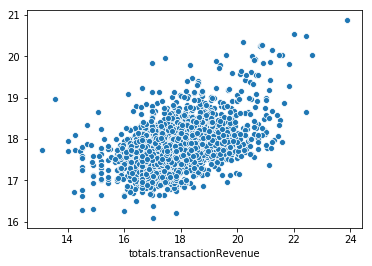

In [46]:
sns.scatterplot(y_test, pred)